In [1]:
#!pip install catboost

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import catboost
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn import model_selection


plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data_url = "분류코드추가_잡코리아취업데이터(전처리).csv"
data_pd = pd.read_csv(data_url, encoding='cp949')

In [5]:
data_pd

,회사명,분류코드,기업분류,시기,지원분야,대학,계열,전공,학점,토익,토익스피킹,오픽,외국어,자격증,해외경험,인턴,수상내역,봉사
0,삼성전자㈜,1,대기업,2023-01-01,해외영업,서울4년제,어문학계열,프랑스어학부,4.00,945,없음,IH,4,0,1,0,1,2
1,삼성전자㈜,1,대기업,2023-01-01,해외영업,서울4년제,어문학계열,프랑스어학부,3.53,0,없음,IH,0,2,0,0,1,6
2,삼성전자㈜,1,대기업,2023-01-01,해외영업,서울4년제,어문학계열,프랑스어학부,3.83,945,없음,IM1,0,3,0,3,0,2
3,삼성전자㈜,1,대기업,2023-01-01,해외영업,서울4년제,어문학계열,프랑스어학부,4.06,980,AM,없음,0,3,1,0,0,0
4,삼성전자㈜,1,대기업,2023-01-01,해외영업,서울4년제,어문학계열,프랑스어학부,4.29,0,Lv6,없음,0,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,삼성전기(주),1,대기업,2022-01-01,전기·전자엔지니어,지방4년제,공학계열,생명화학고분자공학과,3.35,815,Lv6,없음,0,0,0,0,0,0
896,삼성전기(주),1,대기업,2022-01-01,전기·전자엔지니어,지방4년제,공학계열,생명화학고분자공학과,3.62,985,없음,AL,0,3,2,1,1,7
897,삼성전기(주),1,대기업,2022-01-01,전기·전자엔지니어,지방4년제,공학계열,생명화학고분자공학과,4.31,970,Lv7,없음,1,3,2,0,2,3
898,삼성전기(주),1,대기업,2022-01-01,전기·전자엔지니어,지방4년제,공학계열,생명화학고분자공학과,3.50,800,Lv6,없음,0,0,0,0,0,0


In [6]:
data_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   회사명     900 non-null    object 
 1   분류코드    900 non-null    int64  
 2   기업분류    899 non-null    object 
 3   시기      900 non-null    object 
 4   지원분야    900 non-null    object 
 5   대학      900 non-null    object 
 6   계열      900 non-null    object 
 7   전공      900 non-null    object 
 8   학점      900 non-null    float64
 9   토익      900 non-null    int64  
 10  토익스피킹   900 non-null    object 
 11  오픽      900 non-null    object 
 12  외국어     900 non-null    int64  
 13  자격증     900 non-null    int64  
 14  해외경험    900 non-null    int64  
 15  인턴      900 non-null    int64  
 16  수상내역    900 non-null    int64  
 17  봉사      900 non-null    int64  
dtypes: float64(1), int64(8), object(9)
memory usage: 126.7+ KB


In [7]:
data_pd.describe()

,분류코드,학점,토익,외국어,자격증,해외경험,인턴,수상내역,봉사
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,1.244444,3.322656,493.064444,0.143333,1.840000,0.442222,0.675556,0.391111,1.231111
std,0.602389,1.209054,443.059778,0.457918,2.616572,0.983736,1.923238,0.678880,2.101943
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,3.700000,790.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,3.930000,901.250000,0.000000,3.000000,1.000000,1.000000,1.000000,2.000000
max,3.000000,4.500000,990.000000,4.000000,16.000000,14.000000,11.000000,4.000000,16.000000


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder


# 데이터 전처리

#범주형데이터 encoding
label_encoder = LabelEncoder()
data_pd['시기_encoded'] = label_encoder.fit_transform(data_pd['시기'])
data_pd['전공_encoded'] = label_encoder.fit_transform(data_pd['전공'])
data_pd['계열_encoded'] = label_encoder.fit_transform(data_pd['계열'])
data_pd['토익스피킹_encoded'] = label_encoder.fit_transform(data_pd['토익스피킹'])
data_pd['오픽_encoded'] = label_encoder.fit_transform(data_pd['오픽'])
data_pd

X = data_pd[['토익','시기_encoded','전공_encoded', '계열_encoded','토익스피킹_encoded', '오픽_encoded', '자격증', '해외경험', '인턴']]
y = data_pd[['분류코드']] 

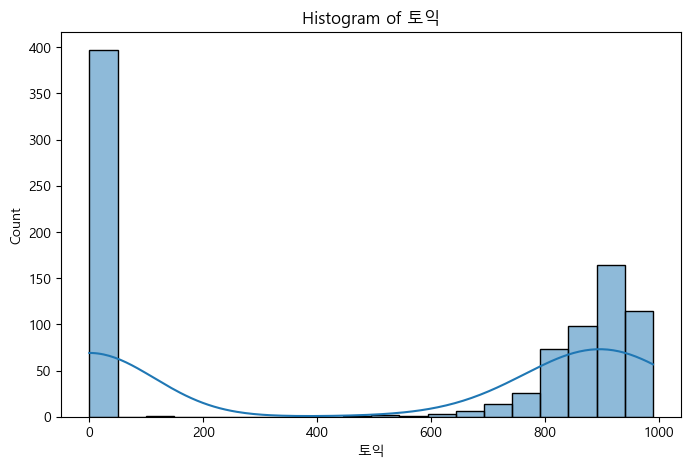

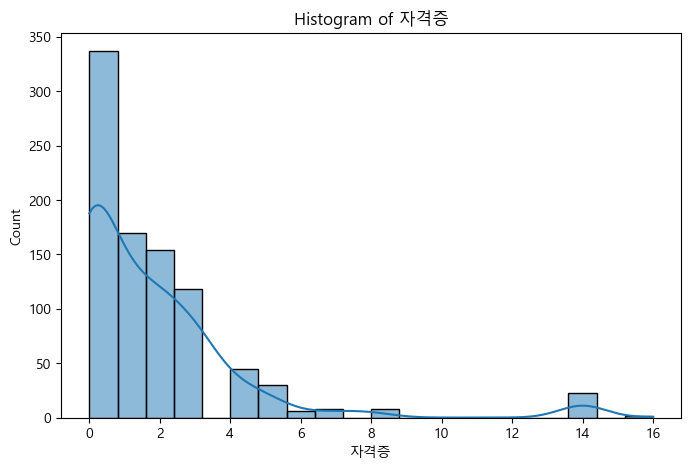

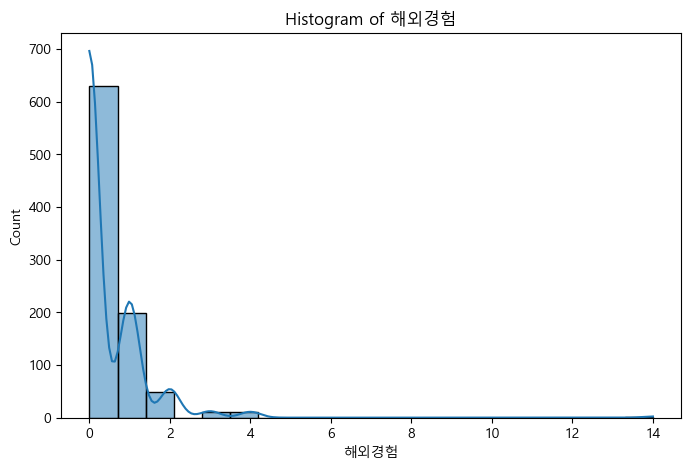

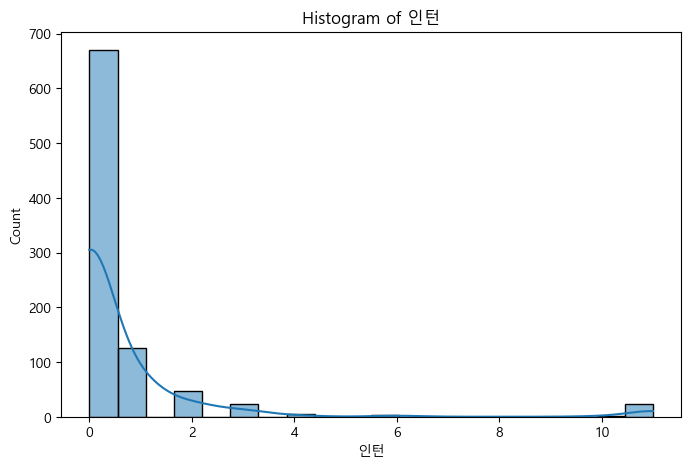

In [9]:
# 수치형 데이터 그래프
numerical_features = ['토익', '자격증', '해외경험', '인턴']
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(data_pd[feature], bins=20, kde=True)
    plt.title(f'Histogram of {feature}')
    plt.show()


<Axes: >

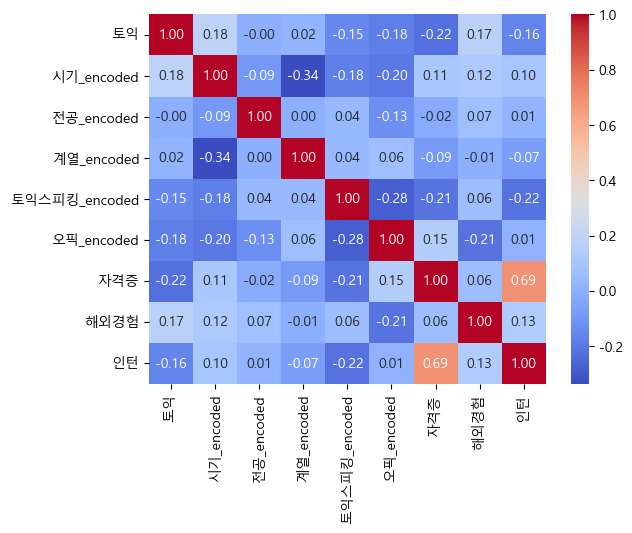

In [10]:
correlation_matrix = X.corr()

# Heatmap으로 상관 관계 시각화
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

In [11]:
#8.CatBoost
kfold = model_selection.KFold(n_splits = 5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scores = {}


ctb_clf = CatBoostClassifier()
ctb_clf.fit(X_train, y_train)
results = model_selection.cross_val_score(ctb_clf, X_test, y_test, cv = kfold)
scores[('8.CatBoost', 'train_score')] = results.mean()
scores[('8.CatBoost', 'test_score')] = ctb_clf.score(X_test, y_test)

pd.Series(scores).unstack()

Learning rate set to 0.077812
0:	learn: 1.0255046	total: 137ms	remaining: 2m 17s
1:	learn: 0.9561898	total: 138ms	remaining: 1m 8s
2:	learn: 0.8953015	total: 139ms	remaining: 46.1s
3:	learn: 0.8405020	total: 140ms	remaining: 34.9s
4:	learn: 0.7975728	total: 141ms	remaining: 28.1s
5:	learn: 0.7579636	total: 142ms	remaining: 23.6s
6:	learn: 0.7257535	total: 144ms	remaining: 20.4s
7:	learn: 0.6946799	total: 145ms	remaining: 18s
8:	learn: 0.6684517	total: 146ms	remaining: 16.1s
9:	learn: 0.6430492	total: 147ms	remaining: 14.6s
10:	learn: 0.6222322	total: 148ms	remaining: 13.3s
11:	learn: 0.6053820	total: 149ms	remaining: 12.3s
12:	learn: 0.5873600	total: 151ms	remaining: 11.4s
13:	learn: 0.5710266	total: 152ms	remaining: 10.7s
14:	learn: 0.5514130	total: 153ms	remaining: 10.1s
15:	learn: 0.5362142	total: 154ms	remaining: 9.48s
16:	learn: 0.5194788	total: 155ms	remaining: 8.97s
17:	learn: 0.5057043	total: 156ms	remaining: 8.53s
18:	learn: 0.4935672	total: 157ms	remaining: 8.13s
19:	learn: 0

,test_score,train_score
8.CatBoost,0.95,0.9


In [12]:
#3-3. 일반화 작업  cross validation(교차검증) -> 과적합과 하이퍼파라미터를 찾자  
from sklearn.model_selection import cross_val_score,KFold

cv  = KFold(n_splits=10, shuffle=True, random_state=42)
results = cross_val_score(ctb_clf, X_train, y_train,cv=cv)
fin_results =  np.mean(results)

type(results)

for i, _  in enumerate(results):
    print('{}번째 교차 검증 정확도 : {} '.format(i,_))
    

print(' 최종  교차 검증 정확도 : {} '.format(fin_results))


Learning rate set to 0.077395
0:	learn: 1.0374708	total: 1.21ms	remaining: 1.21s
1:	learn: 0.9678637	total: 2.15ms	remaining: 1.07s
2:	learn: 0.9128752	total: 3.23ms	remaining: 1.07s
3:	learn: 0.8654533	total: 4.01ms	remaining: 999ms
4:	learn: 0.8181973	total: 4.8ms	remaining: 955ms
5:	learn: 0.7805384	total: 5.58ms	remaining: 925ms
6:	learn: 0.7481495	total: 6.39ms	remaining: 907ms
7:	learn: 0.7197692	total: 6.75ms	remaining: 837ms
8:	learn: 0.6913742	total: 7.56ms	remaining: 833ms
9:	learn: 0.6617852	total: 8.36ms	remaining: 827ms
10:	learn: 0.6406023	total: 9.35ms	remaining: 841ms
11:	learn: 0.6190868	total: 10.2ms	remaining: 841ms
12:	learn: 0.5999024	total: 11.2ms	remaining: 849ms
13:	learn: 0.5824366	total: 12.2ms	remaining: 861ms
14:	learn: 0.5655456	total: 13ms	remaining: 854ms
15:	learn: 0.5450555	total: 13.9ms	remaining: 852ms
16:	learn: 0.5282901	total: 14.8ms	remaining: 858ms
17:	learn: 0.5171232	total: 15.7ms	remaining: 854ms
18:	learn: 0.5070049	total: 16.5ms	remaining: 8

In [13]:
#랜덤 포레스트
from sklearn.ensemble import RandomForestClassifier
 
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
pred = randomforest.predict(X_test)
print(pred)
accuracy_score(pred, y_test)

[1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 3 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 2
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 3 1 1
 1 1 1 1 1 2 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1]


0.9333333333333333

In [14]:
#3-3. 일반화 작업  cross validation(교차검증) -> 과적합과 하이퍼파라미터를 찾자  
from sklearn.model_selection import cross_val_score,KFold

cv  = KFold(n_splits=10, shuffle=True, random_state=42)
results = cross_val_score(randomforest, X_train, y_train,cv=cv)
fin_results =  np.mean(results)

type(results)

for i, _  in enumerate(results):
    print('{}번째 교차 검증 정확도 : {} '.format(i,_))
    

print(' 최종  교차 검증 정확도 : {} '.format(fin_results))

0번째 교차 검증 정확도 : 0.9444444444444444 
1번째 교차 검증 정확도 : 0.9305555555555556 
2번째 교차 검증 정확도 : 0.9027777777777778 
3번째 교차 검증 정확도 : 0.9027777777777778 
4번째 교차 검증 정확도 : 0.9305555555555556 
5번째 교차 검증 정확도 : 0.9027777777777778 
6번째 교차 검증 정확도 : 0.9166666666666666 
7번째 교차 검증 정확도 : 0.9305555555555556 
8번째 교차 검증 정확도 : 0.8888888888888888 
9번째 교차 검증 정확도 : 0.9166666666666666 
 최종  교차 검증 정확도 : 0.9166666666666666 
